In [1]:
!pip install pyAgrum==1.8.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 33.3 MB/s eta 0:00:00


In [2]:
import sys
import os

import numpy as np

import pyAgrum as gum
import pyAgrum.lib.notebook as gnb

%matplotlib inline
from pyAgrum.lib.bn2roc import showROC
from pyAgrum.lib.bn2roc import showPR
from pyAgrum.lib.bn2roc import showROC_PR

SIZE_LEARN=10000
SIZE_VALID=2000


In [3]:

import pyAgrum as gum
import pyAgrum.lib.notebook as gnb

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# login into my google drive account
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# main functions are in this file
learning_lib = drive.CreateFile( {'id' : '1wwSN3AIl_dmayKENu5jnc1BRaNPe8BZc'}).GetContentFile("learning.py")

In [6]:
from IPython.core.display import HTML
import numpy as np
import pandas as pd
import random as rn
import time

# import auxiliary functions
from learning import *

%matplotlib inline

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [7]:
# path to project folder
# please change to your own
#PATH = "/Users/catarina/Google Drive/Colab Notebooks/DDS/"
PATH = "/content/drive/My Drive/Colab Notebooks/"

In [8]:
# name of dataset
DATASET_NAME = "resilience_6_10_feature.csv"

# variable containing the class labels in this case the dataset contains:
# 0 - if not High Risk
# 1 - if High Risk
class_var = "Outcomes"

# load dataset
dataset_path = PATH + "datasets/" + DATASET_NAME
data = pd.read_csv( dataset_path )
data

Housing  Self-rated general health  Psychological distress levels  \
0        0.0                        3.0                            2.0   
1        7.0                        2.0                            4.0   
2        2.0                        3.0                            4.0   
3        6.0                       10.0                            2.0   
4        5.0                       10.0                            2.0   
..       ...                        ...                            ...   
105      NaN                        NaN                            NaN   
106      NaN                        NaN                            NaN   
107      NaN                        NaN                            NaN   
108      NaN                        NaN                            NaN   
109      NaN                        NaN                            NaN   

     Access to insurance  Job opportunities   Outcomes  
0                    1.0                 1.0       1.0  
1                    0.0                 7.0       1.0  
2                    2.0                 6.0       1.0  
3                    2.0                 4.0       0.0  
4                    2.0                 1.0       1.0  
..                   ...                 ...       ...  
105                  NaN                 NaN       NaN  
106                  NaN                 NaN       NaN  
107                  NaN                 NaN       NaN  
108                  NaN                 NaN       NaN  
109                  NaN                 NaN       NaN  

[110 rows x 6 columns]

In [9]:
learner=gum.BNLearner("/content/drive/My Drive/Colab Notebooks/datasets/resilience_6_10_feature.csv")

bn2=learner.useMIIC().learnBN()
currentTime=learner.currentTime()

In [10]:
bn = gum.BayesNet("Resilience")
bn =gum.fastBN("Psychological distress levels{Very Good|Good|poor}<-Housing{Very Good|Good|Poor}->Resilience{Yes|No}<-Job oppurtunity{Yes|No};Transport infrastructure{Very Good|Good|Poor}<-Psychological distress levels{Yes|No}<-Self-rated general health{Yes|No};Resilience{Yes|No}<-Access to insurance{Yes|No}")
print(bn.variable("Resilience"))
print(bn.variable("Housing"))
print(bn.variable("Psychological distress levels"))
print(bn.variable("Job oppurtunity"))
print(bn.variable("Self-rated general health"))
print(bn.variable("Access to insurance"))

Resilience:Labelized({Yes|No})
Housing:Labelized({Very Good|Good|Poor})
Psychological distress levels:Labelized({Very Good|Good|poor})
Job oppurtunity:Labelized({Yes|No})
Self-rated general health:Labelized({Yes|No})
Access to insurance:Labelized({Yes|No})


In [11]:
bn

(pyAgrum.BayesNet<double>@0x70c6100) BN{nodes: 7, arcs: 6, domainSize: 432, dim: 35, mem: 480o}

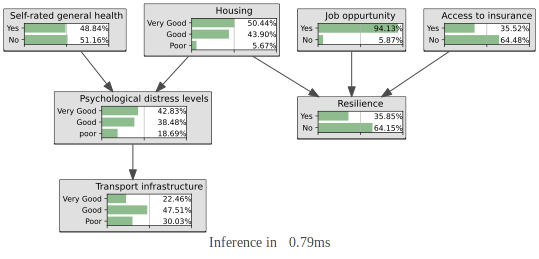

In [12]:


gnb.showInference(bn,size="10")

